<h3>Data preparation</h3>
<h5> After successful loading of data according to a data warehouse documentation. We we need to test a conection to a local MySQL server.</h5>
Note for NON Windows users: all OS paths are MS Windows based, in order to execute the script successful, please modify all paths according your current operating system structure.

In [6]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd

try:
  myconn = conn.connect(user='alex',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  myconn.close()
  print("Connection test succeed!")

Connection test succeed!


<h5>Now we will extract some data from a database, convert retrieved data to dataframe data type and save it to a csv file on a local secondary storage devices.</h5>

In [7]:
import mysql.connector as conn
from mysql.connector import errorcode
import pandas as pd

try:
  myconn = conn.connect(user='alex',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  # execute the SQL query using execute() method.
  cursor.execute ("select * from users")
  # fetch all of the rows from the query
  data = cursor.fetchall()
  # save to a file
  df = pd.DataFrame(data, columns=["User_ID","Number","Test_User"])
  df.to_csv('C:\myuserfile.csv', index=False)
  # print the rows
  #for row in data :
    #print (row)
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("All OK!!!!")

All OK!!!!


<h5>Now we will load data from a file saved earlier and remove all NaNs(clean data). Just to test if it is working.</h5>

In [8]:
import pandas as pd
dataset_filename = 'C:\myuserfile.csv'

all_content = pd.read_csv(dataset_filename)
all_content = all_content.fillna("")
#print (all_content)
print("All OK!!")

All OK!!


<h5>Now we will retrieve data from a 'calllog' table and set a limit to 10000 records as the table contains a lot more records and it may take to long to retrieve data. Also we will convert data into DataFrame and set columns names according data warehouse documentation and finaly save it into a file.</h5>

In [40]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd

try:
  myconn = conn.connect(user='alex',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  # execute the SQL query using execute() method.
  cursor.execute ("select * from calllog LIMIT 5000")
  # fetch all of the rows from the query
  data = cursor.fetchall()
  df = pd.DataFrame(data, columns=["db_key","Time","Status","Direction","Description","Number","Name","Contact","Flags",
                                                 "Duration","Link", "Subject", "LogId", "DurationType"])
  #print(df)                                 
  df.to_csv('C:\mycalllogfile.csv', index=False)
  # print the rows just to see what's inside 
  #for row in data :
    #print (row)
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("OK!!")

OK!!


<h5>Now we will retrieve data from a file saved earlier to calculate percentile and graphically display calls direction.</h5>

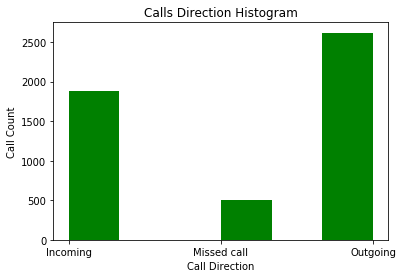

Total Number of calls: 4773
Incoming calls: 38.1%
Missed calls: 10.1%
Outgoing calls: 51.8%


In [41]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = 'C:\mycalllogfile.csv'
all_content = pd.read_csv(dataset_filename)
all_content = all_content.fillna("")
direction = all_content['Direction']
spec = all_content.groupby('Direction')['Time'].nunique()
total = spec[0] + spec[1] + spec[2]
incoming = "%.1f" %(100/total*spec[0])
missed = "%.1f" %(100/total*spec[1])
outgoing = "%.1f" %(100/total*spec[2])
plt.title("Calls Direction Histogram")
plt.xlabel("Call Direction")
plt.ylabel("Call Count")
plt.hist(direction, 6,color="green",histtype='bar')
plt.show()
print("Total Number of calls: " + str(total))
print("Incoming calls: " + incoming + "%")
print("Missed calls: " + missed + "%")
print("Outgoing calls: " + outgoing + "%")

<h5>Now we will produce same analysis on the same dataset, but now on the calls 'status' table.</h5>

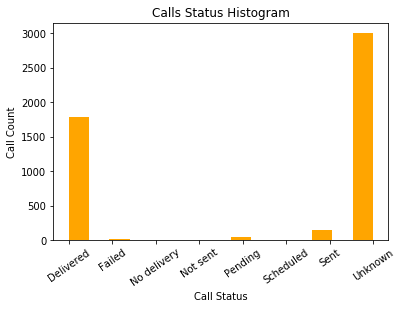

Total Number of calls: 4955
Unknown Call Status: 58.4%
Delivered Call Status: 34.7%
Faled Call Status: 0.3%
No Delivery Call Status: 0.1%
Not Sent Call Status: 0.0%
Pending Call Status: 0.8%
Scheuled Call Status: 0.0%
Sent Call Status: 2.8%


In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset_filename = 'C:\mycalllogfile.csv'
all_content = pd.read_csv(dataset_filename)
all_content = all_content.fillna("Unknown")
status = all_content['Status']
spec = all_content.groupby('Status')['Time'].nunique()
total = spec[0] + spec[1] + spec[2] + spec[3] + spec[4] + spec[5] + spec[6] + spec[6] + spec[7]
unknown = str("%.1f" %(100/total*spec[7]))+"%"
delivered = str("%.1f" %(100/total*spec[0]))+"%"
faled = str("%.1f" %(100/total*spec[1]))+"%"
nodelivery = str("%.1f" %(100/total*spec[2]))+"%"
notsent = str("%.1f" %(100/total*spec[3]))+"%"
pending = str("%.1f" %(100/total*spec[4]))+"%"
scheuled = str("%.1f" %(100/total*spec[5]))+"%"
sent = str("%.1f" %(100/total*spec[6]))+"%"
plt.title("Calls Status Histogram")
plt.xlabel("Call Status")
plt.ylabel("Call Count")
plt.xticks(rotation=35)
plt.hist(status, 15,color="orange",histtype='bar')
plt.show()
print("Total Number of calls: " + str(total))
print("Unknown Call Status: " + unknown)
print("Delivered Call Status: " + delivered)
print("Faled Call Status: " + faled)
print("No Delivery Call Status: " + nodelivery)
print("Not Sent Call Status: " + notsent)
print("Pending Call Status: " + pending)
print("Scheuled Call Status: " + scheuled)
print("Sent Call Status: " + sent)

<h5>Now we will retrieve and save data from 'sms' table.</h5>

In [13]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd

try:
  myconn = conn.connect(user='alex',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  # execute the SQL query using execute() method.
  cursor.execute ("select * from sms")
  # fetch all of the rows from the query
  data = cursor.fetchall()
  # convert to a DataFrame
  df = pd.DataFrame(data, columns=["db_key","Time","Box","Status","Totallength","Letternbr","Address","Rid"])
  # Save to a file
  df.to_csv('C:\mysmsfile.csv', index=False)
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("All OK!!!")

All OK!!!


<h5>Now we will retrieve data from a file saved earlier to calculate percentile and graphically display sms statistics.</h5>

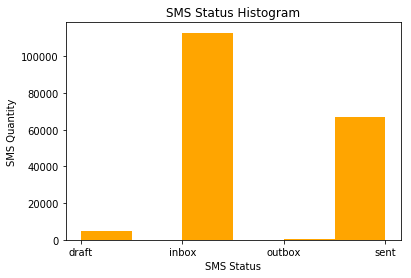

Total Quantity of SMS: 162280
Draft SMS Quantity: 4910 - 3.0%
Inbox SMS Quantity: 92261 - 56.9%
Outbox SMS Quantity: 297 - 0.2%
Sent SMS Quantity: 64812 - 39.9%


In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
dataset_filename = 'C:\mysmsfile.csv'

all_content = pd.read_csv(dataset_filename)
all_content = all_content.fillna("")
status = all_content['Box']
spec = all_content.groupby(by='Box')['Time'].nunique()
total = spec[0] + spec[1] + spec[2] + spec[3]
draft = "%.1f" %(100/total*spec[0])
inbox = "%.1f" %(100/total*spec[1])
outbox = "%.1f" %(100/total*spec[2])
sent = "%.1f" %(100/total*spec[3])

plt.title("SMS Status Histogram")
plt.xlabel("SMS Status")
plt.ylabel("SMS Quantity")

plt.hist(status, 6,color=["orange"])
plt.show()

print("Total Quantity of SMS: " + str(total))
print("Draft SMS Quantity: " + str(spec[0]) + " - " + draft + "%")
print("Inbox SMS Quantity: " + str(spec[1]) + " - " + inbox + "%")
print("Outbox SMS Quantity: " + str(spec[2]) + " - " + outbox + "%")
print("Sent SMS Quantity: " + str(spec[3]) + " - " + sent + "%")

<h5>Here, retrieve data from a different table (demographics table). The way to access to the table is the same as for user or calllogs table, after that we also convert retrieved data to dataframe data type and save it to a csv file on a local secondary storage devices. The path used is different because it has been used on macOS operating system on a different computer.</h5>

In [15]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd
import os

data_folder = os.path.expanduser('C:/')
data_filename = os.path.join(data_folder, "myfile.csv")

try:
  myconn = conn.connect(user='arnaud',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  cursor.execute ("select * from demographics LIMIT 500")
  data = cursor.fetchall()
  tofile = pd.DataFrame(data, columns=["ID", "Gender", "Group", "12", "12-18", "18-30", "30-40", "40-50", "50-65", "65", "Working", "Phone_Bill"])
 
  tofile.to_csv(data_filename, index=False)
  #for row in data :
    #print (row)
  cursor.close()
  myconn.close()
  print("Success !!!")

Success !!!


<h5>After, we will we will load data from a file saved earlier and replace all NaNs(clean data) by "0" value, we also used some options to display the results clearly.</h5>

In [16]:
import pandas as pd
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
data_folder = os.path.join(os.path.expanduser('C:/'))
data_filename = os.path.join(data_folder, "myfile.csv")
newdata = pd.read_csv(data_filename)
newdata = newdata.fillna(0)
print (newdata.head())

     ID  Gender  Group  12  12-18  18-30  30-40  40-50  50-65  65  Working  Phone_Bill
0  5924     1.0      4   0      0    0.0    2.0      0    0.0   0      1.0         1.0
1  5925     1.0      4   0      0    0.0    0.0      0    0.0   0      4.0         1.0
2  5927     2.0      3   0      0    3.0    0.0      0    0.0   0      4.0         1.0
3  5928     1.0      3   0      0    2.0    0.0      0    2.0   0      4.0         1.0
4  5936     2.0      6   0      1    0.0    0.0      1    0.0   0      1.0         1.0


<h5>In the next paragraph, we will retrieve data from a file saved earlier to calculate the sum of numbers displayed in each columns of the demographics table and graphically display the age range.</h5>

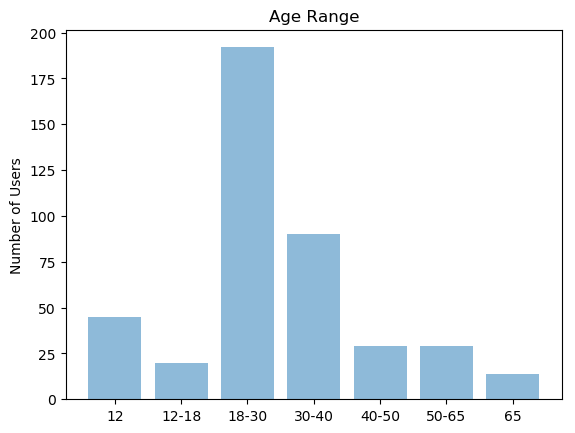

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

Total = newdata['12'].sum()
Total2 = newdata['12-18'].sum()
Total3 = newdata['18-30'].sum()
Total4 = newdata['30-40'].sum()
Total5 = newdata['40-50'].sum()
Total6 = newdata['40-50'].sum()
Total7 = newdata['65'].sum()
 
objects = ('12', '12-18', '18-30', '30-40', '40-50', '50-65', '65')
y_pos = np.arange(len(objects))
performance = [(Total),(Total2),(Total3),(Total4),(Total5),(Total6),(Total7)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of Users')
plt.title('Age Range')
 
plt.show()

<h5>After that, we will use the same table (but different columns) to get and sort informations about the gender of each users and display it in another kind of graph, an horizontal graph.</h5>

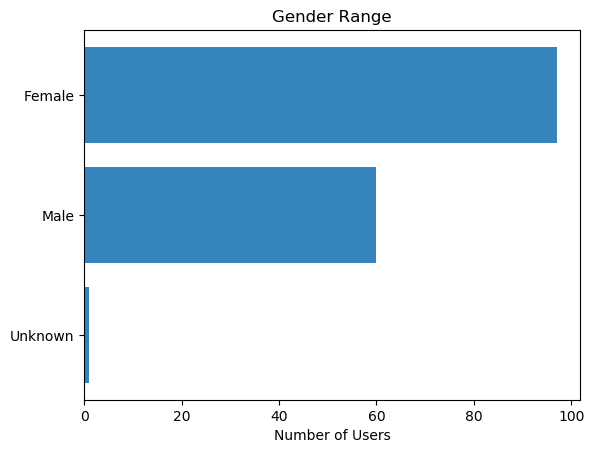

In [18]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

newdata.groupby('Gender')['ID'].nunique()

objects = ('Unknown','Male', 'Female')
y_pos = np.arange(len(objects))
performance = newdata.groupby('Gender')['ID'].nunique()
 
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Users')
plt.title('Gender Range')
 
plt.show()

<h5>Here, we are loading sms data with a limit of 2000 records.</h5>

In [19]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd

data_filename = 'C:\mysms.csv'
try:
  myconn = conn.connect(user='arnaud',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  cursor.execute ("select * from sms LIMIT 2000")
  data = cursor.fetchall()
  tofile = pd.DataFrame(data, columns=["ID", "Time", "Box", "Status", "Lenght", "Letters", "Address", "Rid"])
  tofile.to_csv(data_filename, index=False)
  #for row in data :
    #print (row)
  cursor.close()
  myconn.close()
  print("Data loaded !!")

Data loaded !!


<h5>Here we are loading data from .csv file, sorting the Box column and displaying the count and the structure of the Box column.</h5>

In [20]:
import os
import pandas as pd
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
data_filename = 'C:\mysms.csv'
newdata = pd.read_csv(data_filename)
newdata = newdata.fillna(0)
print (newdata.head(3))
newdata.groupby('Box')['ID'].nunique()

          ID        Time    Box  Status  Lenght                            Letters                                            Address      Rid
0  102864320  1257512946  draft       0       4  {0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0}                                                  0  1048739
1   78700699  1251804081   sent       0      28  {1,0,2,0,0,1,1,0,1,0,0,0,0,0,0,0}  d5b36fe36cc4330a0e16549d3ce0b22ef8381ae10e53ba...  1059506
2   78700699  1251803993  inbox       0      37  {1,1,2,1,0,0,1,0,2,0,0,0,0,0,0,0}  d5b36fe36cc4330a0e16549d3ce0b22ef8381ae10e53ba...  1059505


Box
draft      38
inbox     510
outbox      2
sent      241
Name: ID, dtype: int64

<h5>In this section, we are displaying the pie chart of the Box column.</h5>

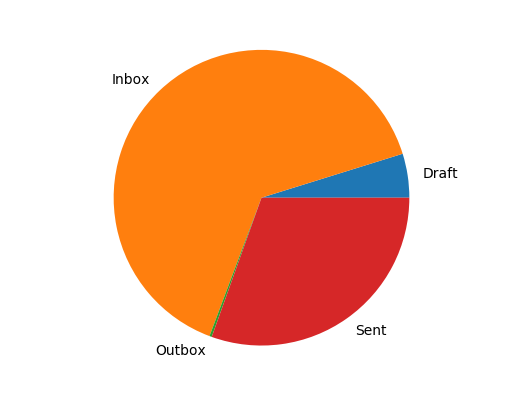

In [21]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show

performance = newdata.groupby('Box')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['Draft','Inbox', 'Outbox', 'Sent'],
    'Data': performance})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<h5>Loading data from application table with a limit of 500 records.</h5>

In [22]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd
import os

data_filename = 'C:\myappfile.csv'

try:
  myconn = conn.connect(user='arnaud',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  cursor.execute ("select * from application LIMIT 500")
  data = cursor.fetchall()
  tofile = pd.DataFrame(data, columns=["ID", "Event", "UID", "Name", "View"])
  tofile.to_csv(data_filename, index=False)

  cursor.close()
  myconn.close()
  print("Data loaded!!!!")

Data loaded!!!!


<h5>Here we are loading data from .csv file, sorting the Event column and displaying the count and the structure of the Event column.</h5>

In [23]:
import pandas as pd
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd
import os

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
data_filename = data_filename = 'C:\myappfile.csv'
newdata = pd.read_csv(data_filename)
newdata = newdata.fillna(0)
print (newdata.head())
newdata.groupby('Event')['ID'].nunique()

         ID                   Event         UID         Name        View
0  78665279     Application.Started  [101fd64c]    Telephone  [101fd64c]
1  78665280  Application.Foreground  [101fd64c]    Telephone  [101fd64c]
2  78665281        Application.View  [101fd64c]    Telephone  [101fd64c]
3  78665298     Application.Started  [100056cf]  screensaver  [00000001]
4  78665299  Application.Foreground  [100056cf]  screensaver  [00000001]


Event
Application.Closed         55
Application.Foreground    164
Application.Started        64
Application.View          217
Name: ID, dtype: int64

<h5>In this section, we are displaying the pie chart of the Event column.</h5>

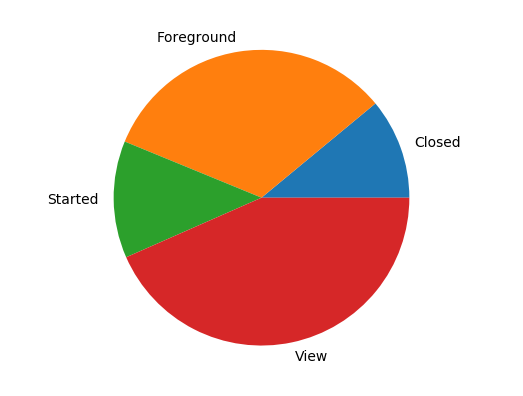

In [24]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show

performance = newdata.groupby('Event')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['Closed','Foreground', 'Started', 'View'],
    'Data': performance})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<h5>Here, we are loading places data without limit.</h5>

In [25]:
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd

data_filename = 'C:\myplacesfile.csv'
try:
  myconn = conn.connect(user='arnaud',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  cursor.execute ("select * from places")
  data = cursor.fetchall()
  tofile = pd.DataFrame(data, columns=["ID", "Place ID", "Place Label", "Family", "Close Friends", 
                                       "Friends", "Colleagues", "Incidental"])

  tofile.to_csv(data_filename, index=False)
  cursor.close()
  myconn.close()
  print("Data loaded !!")

Data loaded !!


<h5>Here we are loading data from .csv file and displaying the structure of the places table.</h5>

In [26]:
import pandas as pd
import mysql.connector as conn
from mysql.connector import errorcode
import csv
import pandas as pd
import os

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
data_filename = 'C:\myplacesfile.csv'
newdata = pd.read_csv(data_filename)
newdata = newdata.fillna(0)
print (newdata.head())

     ID  Place ID  Place Label Family Close Friends Friends Colleagues Incidental
0  5477         3            8      f             f       f          f          t
1  5477         4            1      t             f       f          f          f
2  5477         5            3      f             f       f          t          f
3  5477        10            8      f             f       f          f          t
4  5477        11            3      f             f       t          t          f


<h5>Here we are displaying a pie chart that says if users are visiting places with their families or not.</h5>

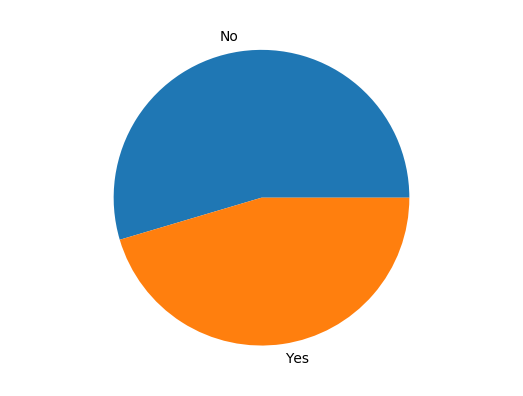

In [27]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show

Result1 = newdata.groupby('Family')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['No','Yes'],
    'Data': Result1})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<h5>Here we are displaying a pie chart that says if users are visiting places with their close friends or not.</h5>

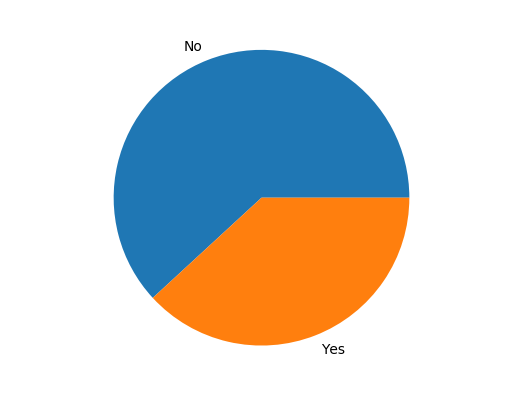

In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show

Result2 = newdata.groupby('Close Friends')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['No','Yes'],
    'Data': Result2})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<h5>Here we are displaying a pie chart that says if users are visiting places with their friends or not.</h5>

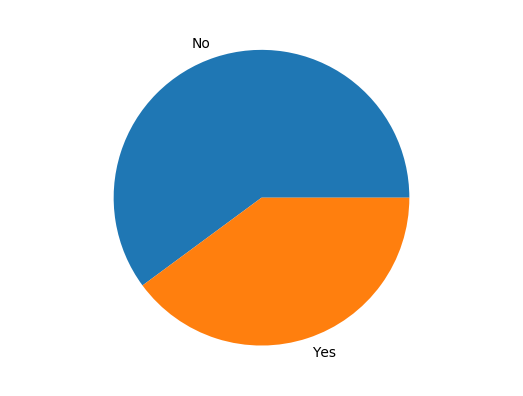

In [29]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show

Result3 = newdata.groupby('Friends')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['No','Yes'],
    'Data': Result3})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<h5>Here we are displaying a pie chart that says if users are visiting places with their colleagues or not.</h5>

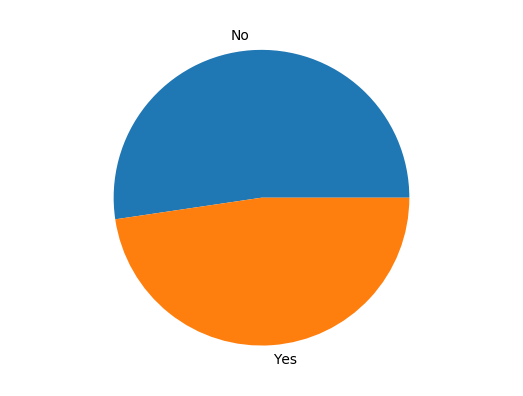

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show

Result4 = newdata.groupby('Colleagues')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['No','Yes'],
    'Data': Result4})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

<h5>Here we are displaying a pie chart of users who are visiting places with incidental people.</h5>

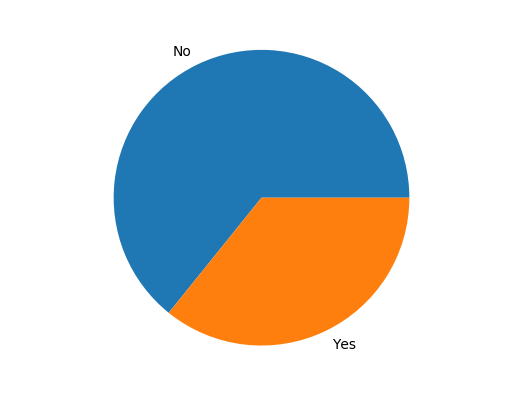

In [39]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import pie, axis, show

Result5 = newdata.groupby('Incidental')['ID'].nunique()

df = pd.DataFrame({
    'Title': ['No','Yes'],
    'Data': Result5})
sums = df.Data.groupby(df.Title).sum()
axis('equal');
pie(sums, labels=sums.index);
plt.show()

<h5> Here we analyzing how many phone calls has been made by males and females in different age groups.</h5>

OK!!


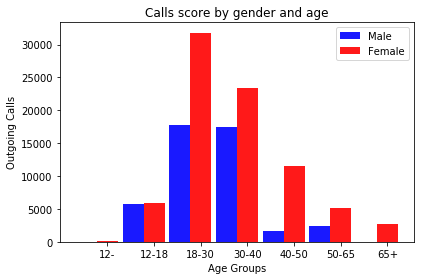

In [52]:
import mysql.connector as conn
from mysql.connector import errorcode
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

args = [5000000]

def getCount(_genderIN,_groupIN,_directionIN):
    _gender = res['Gender'] == _genderIN
    _group = res['AgeGroup'] == _groupIN
    _direction = res['Direction'] == _directionIN
    _final = res[_gender & _group & _direction]
    total_rows = len(_final.index)
    return total_rows

try:
  myconn = conn.connect(user='root',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  result_args = cursor.callproc("getdemographicsCalllog", args)
  #fetch all of the rows from the query
  for result in cursor.stored_results():
    res = DataFrame(result.fetchall())
  res.columns=["Gender","AgeGroup","Time","Direction","Duration","Contact"]
  res['Time'] = pd.to_datetime(res['Time'], unit='s')
  #print(res.head())                                 
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("OK!!")

n_groups = 7

_inDerection = 'Outgoing'

maleOutG1 = getCount(1,1,_inDerection)
fmaleOutG1 = getCount(2,1,_inDerection)
maleOutG2 = getCount(1,2,_inDerection)
fmaleOutG2 = getCount(2,2,_inDerection)
maleOutG3 = getCount(1,3,_inDerection)
fmaleOutG3 = getCount(2,3,_inDerection)
maleOutG4 = getCount(1,4,_inDerection)
fmaleOutG4 = getCount(2,4,_inDerection)
maleOutG5 = getCount(1,5,_inDerection)
fmaleOutG5 = getCount(2,5,_inDerection)
maleOutG6 = getCount(1,6,_inDerection)
fmaleOutG6 = getCount(2,6,_inDerection)
maleOutG7 = getCount(1,7,_inDerection)
fmaleOutG7 = getCount(2,7,_inDerection)

means_male = (maleOutG1,maleOutG2,maleOutG3,maleOutG4,maleOutG5,maleOutG6,maleOutG7)
means_fmale = (fmaleOutG1,fmaleOutG2,fmaleOutG3,fmaleOutG4,fmaleOutG5,fmaleOutG6,fmaleOutG7)

fig,ax = plt.subplots()
index = np.arange(n_groups)

bar_width = 0.45
opacity = 0.9

rect1 = plt.bar(index,means_male,bar_width,
               alpha=opacity,color = 'b',label='Male')

rect1 = plt.bar(index + bar_width,means_fmale,bar_width,
               alpha=opacity,color = 'r',label='Female')

plt.xlabel('Age Groups')
plt.ylabel('Outgoing Calls')
plt.title('Calls score by gender and age')
plt.xticks(index + bar_width,('12-','12-18','18-30','30-40','40-50','50-65','65+'))
plt.legend()

plt.tight_layout()
plt.show()

<h5> Here we analyzing how many phone calls has been received by males and females in different age groups.</h5>

OK!!


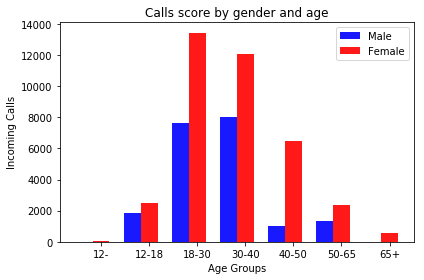

In [51]:
import mysql.connector as conn
from mysql.connector import errorcode
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt

args = [10000000]

def getCount(_genderIN,_groupIN,_directionIN):
    _gender = res['Gender'] == _genderIN
    _group = res['AgeGroup'] == _groupIN
    _direction = res['Direction'] == _directionIN
    malesGroup1 = res[_gender & _group & _direction]
    total_rows = len(malesGroup1.index)
    return total_rows

try:
  myconn = conn.connect(user='root',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  result_args = cursor.callproc("getdemographicsCalllog", args)
  #fetch all of the rows from the query
  for result in cursor.stored_results():
    res = DataFrame(result.fetchall())
  res.columns=["Gender","AgeGroup","Time","Direction","Duration","Contact"]
  res['Time'] = pd.to_datetime(res['Time'], unit='s')
  #print(res.head())                                 
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("OK!!")

n_groups = 7

_inDerection = 'Incoming'

maleOutG1 = getCount(1,1,_inDerection)
fmaleOutG1 = getCount(2,1,_inDerection)
maleOutG2 = getCount(1,2,_inDerection)
fmaleOutG2 = getCount(2,2,_inDerection)
maleOutG3 = getCount(1,3,_inDerection)
fmaleOutG3 = getCount(2,3,_inDerection)
maleOutG4 = getCount(1,4,_inDerection)
fmaleOutG4 = getCount(2,4,_inDerection)
maleOutG5 = getCount(1,5,_inDerection)
fmaleOutG5 = getCount(2,5,_inDerection)
maleOutG6 = getCount(1,6,_inDerection)
fmaleOutG6 = getCount(2,6,_inDerection)
maleOutG7 = getCount(1,7,_inDerection)
fmaleOutG7 = getCount(2,7,_inDerection)

means_male = (maleOutG1,maleOutG2,maleOutG3,maleOutG4,maleOutG5,maleOutG6,maleOutG7)
means_fmale = (fmaleOutG1,fmaleOutG2,fmaleOutG3,fmaleOutG4,fmaleOutG5,fmaleOutG6,fmaleOutG7)

fig,ax = plt.subplots()
index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.9

rect1 = plt.bar(index,means_male,bar_width,
               alpha=opacity,color = 'b',label='Male')

rect1 = plt.bar(index + bar_width,means_fmale,bar_width,
               alpha=opacity,color = 'r',label='Female')

plt.xlabel('Age Groups')
plt.ylabel('Incoming Calls')
plt.title('Calls score by gender and age')
plt.xticks(index + bar_width,('12-','12-18','18-30','30-40','40-50','50-65','65+'))
plt.legend()

plt.tight_layout()
plt.show()

<h5> Here we analyzing how many phone messages has been sent by males and females in different age groups.</h5>

OK!!


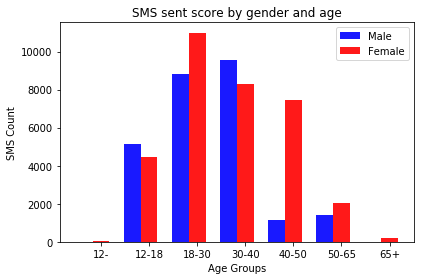

In [53]:
import mysql.connector as conn
from mysql.connector import errorcode
from pandas import DataFrame

args = [1000000]

def getCount(_genderIN,_groupIN,_boxIN):
    _gender = res['Gender'] == _genderIN
    _group = res['AgeGroup'] == _groupIN
    _box = res['Box'] == _boxIN
    malesGroup1 = res[_gender & _group & _box]
    total_rows = len(malesGroup1.index)
    return total_rows

try:
  myconn = conn.connect(user='root',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  result_args = cursor.callproc("getdemographicsSMSlog", args)
  #fetch all of the rows from the query
  for result in cursor.stored_results():
    res = DataFrame(result.fetchall())
  res.columns=["Gender","AgeGroup","Box","SmsLength"]
  #print(res.head())                                 
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("OK!!")
    
n_groups = 7

_inDerection = 'sent'

maleOutG1 = getCount(1,1,_inDerection)
fmaleOutG1 = getCount(2,1,_inDerection)
maleOutG2 = getCount(1,2,_inDerection)
fmaleOutG2 = getCount(2,2,_inDerection)
maleOutG3 = getCount(1,3,_inDerection)
fmaleOutG3 = getCount(2,3,_inDerection)
maleOutG4 = getCount(1,4,_inDerection)
fmaleOutG4 = getCount(2,4,_inDerection)
maleOutG5 = getCount(1,5,_inDerection)
fmaleOutG5 = getCount(2,5,_inDerection)
maleOutG6 = getCount(1,6,_inDerection)
fmaleOutG6 = getCount(2,6,_inDerection)
maleOutG7 = getCount(1,7,_inDerection)
fmaleOutG7 = getCount(2,7,_inDerection)

means_male = (maleOutG1,maleOutG2,maleOutG3,maleOutG4,maleOutG5,maleOutG6,maleOutG7)
means_fmale = (fmaleOutG1,fmaleOutG2,fmaleOutG3,fmaleOutG4,fmaleOutG5,fmaleOutG6,fmaleOutG7)

fig,ax = plt.subplots()
index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.9

rect1 = plt.bar(index,means_male,bar_width,
               alpha=opacity,color = 'b',label='Male')

rect1 = plt.bar(index + bar_width,means_fmale,bar_width,
               alpha=opacity,color = 'r',label='Female')

plt.xlabel('Age Groups')
plt.ylabel('SMS Count')
plt.title('SMS sent score by gender and age')
plt.xticks(index + bar_width,('12-','12-18','18-30','30-40','40-50','50-65','65+'))
plt.legend()

plt.tight_layout()
plt.show()

<h5> Here we analyzing how many phone messages has been received by males and females in different age groups.</h5>

OK!!


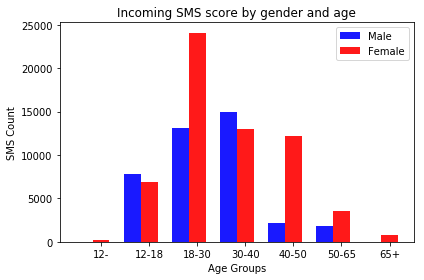

In [54]:
import mysql.connector as conn
from mysql.connector import errorcode
from pandas import DataFrame

args = [1000000]

def getCount(_genderIN,_groupIN,_boxIN):
    _gender = res['Gender'] == _genderIN
    _group = res['AgeGroup'] == _groupIN
    _box = res['Box'] == _boxIN
    malesGroup1 = res[_gender & _group & _box]
    total_rows = len(malesGroup1.index)
    return total_rows

try:
  myconn = conn.connect(user='root',password='123456', host='localhost',database='mdcdb')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  cursor = myconn.cursor()
  result_args = cursor.callproc("getdemographicsSMSlog", args)
  #fetch all of the rows from the query
  for result in cursor.stored_results():
    res = DataFrame(result.fetchall())
  res.columns=["Gender","AgeGroup","Box","SmsLength"]
  # print(res.head())                                 
  # close the cursor object
  cursor.close ()
  myconn.close()
  print("OK!!")
    
n_groups = 7

_inDerection = 'inbox'

maleOutG1 = getCount(1,1,_inDerection)
fmaleOutG1 = getCount(2,1,_inDerection)
maleOutG2 = getCount(1,2,_inDerection)
fmaleOutG2 = getCount(2,2,_inDerection)
maleOutG3 = getCount(1,3,_inDerection)
fmaleOutG3 = getCount(2,3,_inDerection)
maleOutG4 = getCount(1,4,_inDerection)
fmaleOutG4 = getCount(2,4,_inDerection)
maleOutG5 = getCount(1,5,_inDerection)
fmaleOutG5 = getCount(2,5,_inDerection)
maleOutG6 = getCount(1,6,_inDerection)
fmaleOutG6 = getCount(2,6,_inDerection)
maleOutG7 = getCount(1,7,_inDerection)
fmaleOutG7 = getCount(2,7,_inDerection)

means_male = (maleOutG1,maleOutG2,maleOutG3,maleOutG4,maleOutG5,maleOutG6,maleOutG7)
means_fmale = (fmaleOutG1,fmaleOutG2,fmaleOutG3,fmaleOutG4,fmaleOutG5,fmaleOutG6,fmaleOutG7)

fig,ax = plt.subplots()
index = np.arange(n_groups)

bar_width = 0.35
opacity = 0.9

rect1 = plt.bar(index,means_male,bar_width,
               alpha=opacity,color = 'b',label='Male')

rect1 = plt.bar(index + bar_width,means_fmale,bar_width,
               alpha=opacity,color = 'r',label='Female')

plt.xlabel('Age Groups')
plt.ylabel('SMS Count')
plt.title('Incoming SMS score by gender and age')
plt.xticks(index + bar_width,('12-','12-18','18-30','30-40','40-50','50-65','65+'))
plt.legend()

plt.tight_layout()
plt.show()